In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from fastai.vision.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
no_tumor_train=Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor')
glioma_tumor_train=Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor')
meningioma_tumor_train=Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor')
pituitary_tumor_train=Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor')

In [3]:
no_tumor_train.ls()

(#395) [Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg')...]

In [4]:
glioma_tumor_train.ls()

(#826) [Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (180).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (552).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (11).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (626).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (541).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (546).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (664).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (225).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (399).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (513).jpg')...]

In [5]:
meningioma_tumor_train.ls()

(#822) [Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m1(197).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m3 (182).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (162).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m3 (11).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m2 (109).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m2 (89).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m3 (80).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m1(17).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m1(7).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m3 (55).jpg')...]

In [6]:
pituitary_tumor_train.ls()

(#827) [Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (538).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (374).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (455).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (407).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (371).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (138).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (202).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (616).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (782).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (628).jpg')...]

# CREATING THE DATABLOCK

In [11]:
full_set=no_tumor_train.ls()+glioma_tumor_train.ls()+meningioma_tumor_train.ls()+pituitary_tumor_train.ls()

In [12]:
full_set

(#2870) [Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg')...]

In [17]:
db=DataBlock()

In [18]:
ds=db.datasets(full_set)

In [19]:
ds[0]

(Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg'),
 Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg'))

In [26]:
def get_x(r):
    return r
def get_y(r):
    if 'glioma' in r.parent.name:
        return 'glioma'
    elif 'pituitary' in r.parent.name:
        return 'pituitary'
    elif 'meningioma' in r.parent.name:
        return 'meningioma'
    else:
        return 'no'

In [27]:
dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),get_x=get_x,get_y=get_y)

In [28]:
ds=dblock.datasets(together)

In [29]:
ds[0]

(PILImage mode=RGB size=236x236, TensorCategory(2))

In [30]:
ds.vocab

['glioma', 'meningioma', 'no', 'pituitary']

In [31]:
from fastcore.parallel import *

In [33]:
def f(o): return PILImage.create(o).size
sizes = parallel(f, together, n_workers=8)
pd.Series(sizes).value_counts()

(512, 512)    2309
(236, 236)      46
(225, 225)      30
(256, 256)      15
(442, 442)      15
              ... 
(622, 777)       1
(626, 686)       1
(212, 280)       1
(224, 262)       1
(360, 378)       1
Name: count, Length: 361, dtype: int64

In [34]:
item_tfms=Resize(480,method='squish')

In [35]:
dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),get_x=get_x,get_y=get_y,item_tfms=Resize(480,method='squish'))

In [40]:
dls=dblock.dataloaders(together)

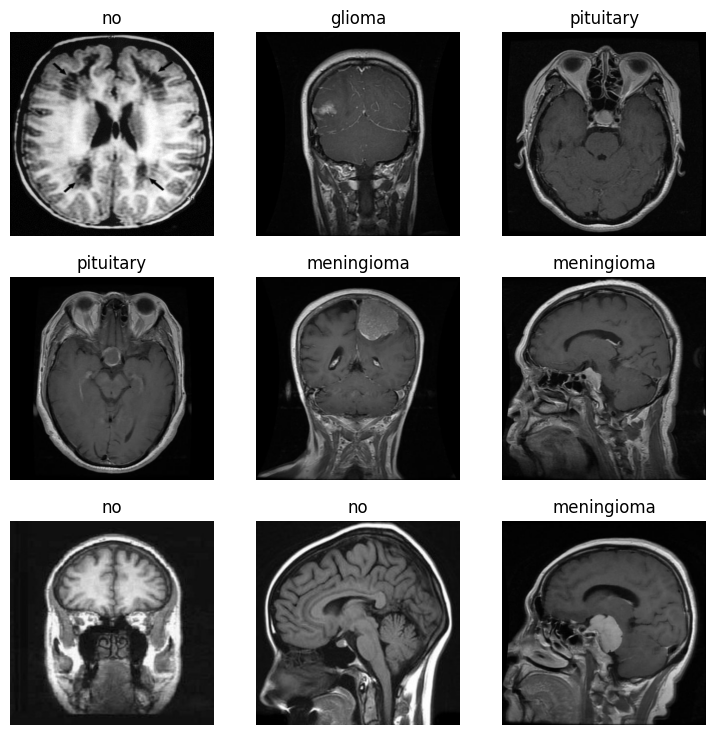

In [42]:
dls.show_batch()

In [44]:
len(dls.train.one_batch()[1])

64

In [46]:
learner = vision_learner(dls,resnet18,metrics=accuracy)

SuggestedLRs(minimum=0.00831763744354248, steep=9.12010818865383e-07, valley=0.0008317637839354575)

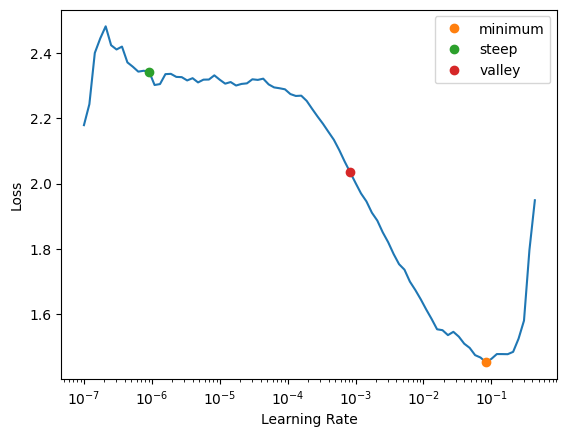

In [47]:
learner.lr_find(suggest_funcs=(minimum,steep,valley))

# Fine tuning the learner object

In [50]:
learner.fine_tune(
    3,#number of epochs
    base_lr=0.065,#learning rate
)

epoch,train_loss,valid_loss,accuracy,time
0,0.201419,0.952863,0.874564,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.715161,2.003828,0.766551,00:21
1,0.513755,0.666861,0.860627,00:21
2,0.319834,0.195539,0.942509,00:21


# SAMPLE PREDICTION

In [58]:
test1=Path('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor')
test2=Path('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor')
test3=Path('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor')
test4=Path('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor')
test=test1.ls()+test2.ls()+test3.ls()+test4.ls()

In [69]:
import random
random_path=random.choice(test)
random_path

Path('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(59).jpg')

In [70]:
learner.predict(random_path),random_path

(('no', tensor(2), tensor([3.0745e-07, 4.0802e-05, 9.9995e-01, 1.0025e-05])),
 Path('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(59).jpg'))